In [8]:
from pandas import DataFrame, concat
from numpy import argmax

from data.file import model_convolutional
from keras.models import load_model
from model.convolutional import reshape_input
from data.load import load_train_data, load_test_data

from reporting.evaluation import plot_confusion_matrix
from reporting.images import display_dataframe

In [9]:
model = load_model(model_convolutional)

In [10]:
x_test, y_test = load_test_data()
x_test_reshaped, y_test_reshaped = reshape_input(x_test, y_test)


In [11]:
compare_items = 100
prediction = [argmax(x) for x in model.predict(x_test_reshaped[:compare_items])]
expectation = y_test_reshaped[:compare_items]
comparison = concat([expectation.rename('actual'), DataFrame(prediction, columns=['prediction'])], axis=1)

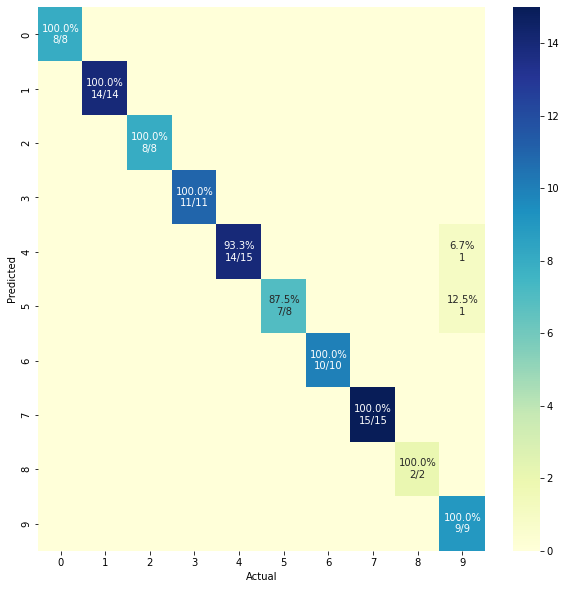

In [12]:
plot_confusion_matrix(prediction, expectation)


# Mismatches

The following items did not match the expectation.

In [13]:
missmatch = comparison[comparison.prediction != comparison.actual]
missmatch

,actual,prediction
62,9,5
92,9,4


Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.


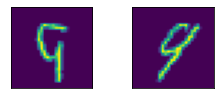

In [14]:
display_dataframe(x_test.iloc[missmatch.index])